In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 500
%config InlineBackend.figure_format = 'svg'

In [3]:
import seaborn as sns

In [4]:
data=pd.read_csv('winemag-data_first150k.csv')
data.head()
data.shape

(150930, 11)

In [5]:
data.fillna(0)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,0,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,0,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,0,91,20.0,Southern Italy,Fiano di Avellino,0,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,0,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,0,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,0,Champagne Blend,Gosset


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [7]:
data.describe()


,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [8]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [9]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
plt.figure(figsize=(14,8))
sns.set(style='darkgrid')
sns.barplot(data.country.value_counts()[:10].index,data.country.value_counts()[:10].values)
plt.xlabel('Countries')
plt.ylabel('Wine Count')
plt.show()

In [ ]:
data.points.nunique()

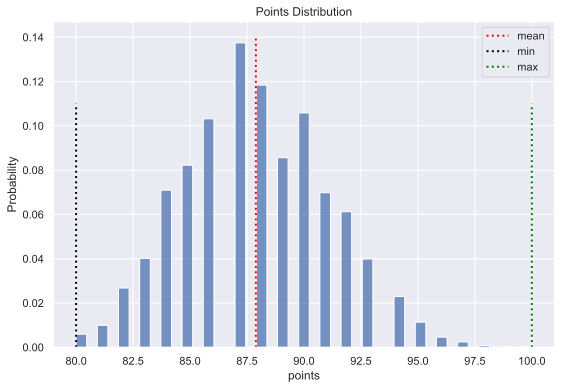

In [11]:
plt.figure(figsize=(9,6))
#data.points.hist(bins=55)
g=sns.histplot(data,x='points',stat='probability',bins=43)

a=plt.vlines(data['points'].mean(),0,0.14,color='red',ls=':',label='mean',linewidth=2.0)
b=plt.vlines(data['points'].min(),0,0.11,color='black',ls=':',label='min',linewidth=2.0)
c=plt.vlines(data['points'].max(),0,0.11,color='green',ls=':',label='max',linewidth=2.0)
sns.set(style='darkgrid')
plt.legend()
plt.title('Points Distribution')



plt.show()

In [ ]:
data['points']

In [ ]:
data['points'].describe()

In [ ]:
data['price'].describe()

In [ ]:
plt.figure(figsize=(14,8))
data.price.hist(bins=200)

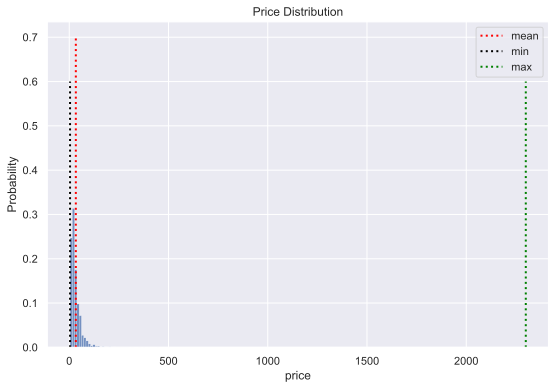

In [13]:
plt.figure(figsize=(9,6))
#data.points.hist(bins=55)
g=sns.histplot(data,x='price',stat='probability',bins=200)
sns.set(style='darkgrid')
a=plt.vlines(data['price'].mean(),0,0.7,color='red',ls=':',label='mean',linewidth=2.0)
b=plt.vlines(data['price'].min(),0,0.6,color='black',ls=':',label='min',linewidth=2.0)
c=plt.vlines(data['price'].max(),0,0.6,color='green',ls=':',label='max',linewidth=2.0)
plt.legend()
plt.title('Price Distribution')



plt.show()